# Extract images from tfrecord dataset and save them as single as single npy files.

Download datasets.

In [ ]:
!gdown https://drive.google.com/file/d/1aQ_mpyoxlQ2OgJ7vXkPk04sogAIpbyNF/view?usp=sharing --fuzzy
!gdown https://drive.google.com/file/d/1-1bTtmmSau_o4MHBqT_FizS0-x_TwH4z/view?usp=sharing --fuzzy
!gdown https://drive.google.com/file/d/1-4T8FSnJK0PZmOuwS295BTg68lA5Q49-/view?usp=sharing --fuzzy
!gdown https://drive.google.com/file/d/1-7gXamdIWTDISiyOu40bd0xCfg1Q4a-O/view?usp=sharing --fuzzy
!gdown https://drive.google.com/file/d/1-8A598Uqj2RV705DaFF5HdM2X12bowFx/view?usp=sharing --fuzzy

Define loading and saving paths.

In [3]:
tf_records_path = '/content/split_{}.record'
output_path = '/content/train_data_npy/'

Dataset loading and decoding functions.

In [4]:
import tensorflow as tf
import numpy as np

def load_tf_records(filepath):
    filenames = tf.io.gfile.glob(filepath)
    dataset = tf.data.TFRecordDataset(filenames,num_parallel_reads=tf.data.experimental.AUTOTUNE)
    return dataset

def tf_records_file_features_description():
    image_feature_description = {
        
        'image/height': tf.io.FixedLenFeature([], tf.int64),
        'image/width': tf.io.FixedLenFeature([], tf.int64),
        'image': tf.io.FixedLenFeature([],tf.string),
        'label/P': tf.io.FixedLenFeature([], tf.float32),
        'label/K': tf.io.FixedLenFeature([], tf.float32),
        'label/Mg': tf.io.FixedLenFeature([], tf.float32),
        'label/Ph': tf.io.FixedLenFeature([], tf.float32),
    }
    return image_feature_description

def decode_dataset(example_proto):
    features=tf.io.parse_single_example(example_proto, tf_records_file_features_description())

    image=features['image']
    height=features['image/height']
    width=features['image/width']
    image=tf.io.decode_raw(image,tf.int16)
    image=tf.reshape(image,[height,width,150])

    P=features['label/P']
    K=features['label/K']
    Mg=features['label/Mg']
    Ph=features['label/Ph']

    height=features['image/height']
    width=features['image/width']

    label=[P,K,Mg,Ph]

    return image, label, height, width

In [5]:
# Load and concatenate partitions
splits = [load_tf_records(tf_records_path.format(i)).map(decode_dataset, num_parallel_calls=tf.data.AUTOTUNE) for i in range(1,6)]
full_dataset = splits[0].concatenate(splits[1]).concatenate(splits[2]).concatenate(splits[3]).concatenate(splits[4])

In [13]:
import os
i=0
num_train_images = 1732
os.mkdir('/content/train_data_npy/')

for image, label, height, width in full_dataset:
    np.save(output_path + str(i) + '.npy', image)
    i+=1

if num_train_images==i:
    print('Succefully coverted tfrecord dataset to single npy files.')

Succefully coverted tfrecord dataset to single npy files.


Check exactness of procedure.

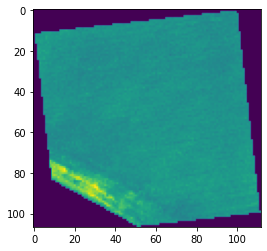

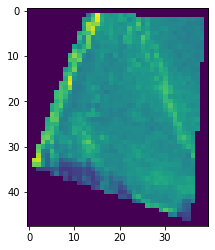

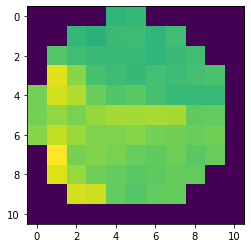

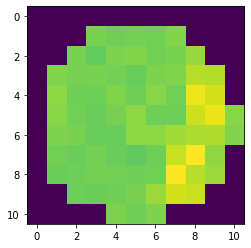

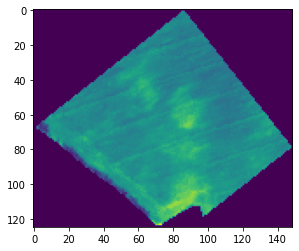

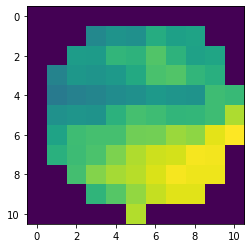

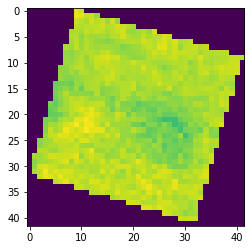

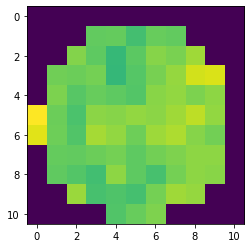

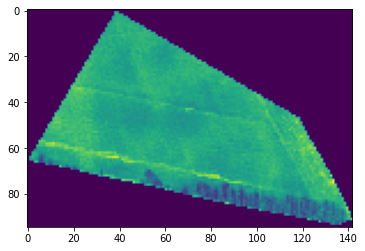

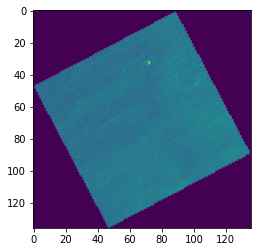

In [14]:
import matplotlib.pyplot as plt

for i in range(10):
    im = np.load(output_path + str(i) + '.npy')
    plt.imshow(im[:,:,0])
    plt.show()